In [1]:
import random
import sys
from collections import deque
from recordclass import dataobject
import time
import matplotlib.pyplot as plt
import math
import gc
import numpy as np

In [2]:
def random_strings(num_strings):
    random.seed(2)
    symbols = "abcdefghijklmnopqrstuvwxyz"

    for i in range(num_strings):
        length = random.randint(5, 15)
        yield "".join(random.choices(symbols, k=length))

In [3]:
class Node:
    #__slots__ = ("char", "count", "lo", "eq", "hi")
    __slots__ = ("char", "lo", "eq", "hi")

    def __init__(self, char):
        self.char = char
#         self.count = 0

        self.lo = None
        self.eq = None
        self.hi = None

class TernarySearchTree():
    """Ternary search tree that stores counts for n-grams
    and their subsequences.
    """

    def __init__(self, splitchar=None):
        self.root = None
        self.splitchar = splitchar

    def insert(self, string):
        self.root = self._insert(string, self.root)

    def _insert(self, string, node):
        """Insert string at a given node.
        """
        if not string:
            return node

        char, *rest = string

        if node is None:
            node = Node(char)

        if char == node.char:
            if not rest:
#                 node.count += 1
                return node
            else:
#                 if rest[0] == self.splitchar:
#                     node.count += 1
                node.eq = self._insert(rest, node.eq)
        elif char < node.char:
            node.lo = self._insert(string, node.lo)
        else:
            node.hi = self._insert(string, node.hi)

        return node

def train(N):
    tree = TernarySearchTree("#")
    grams = deque(maxlen=4)

    for token in random_strings(N):
        grams.append(token)
        tree.insert("#".join(grams))
    return tree

In [4]:
class Node2(dataobject):
#     __fields__ = ("char", "count", "lo", "eq", "hi")
    __fields__ = ("char", "lo", "eq", "hi")
    __options__ = {'fast_new':True}
#     lo = None
#     eq = None
#     hi = None

class TernarySearchTree2():
    """Ternary search tree that stores counts for n-grams
    and their subsequences.
    """

    def __init__(self, splitchar=None):
        self.root = None
        self.splitchar = splitchar

    def insert(self, string):
        self.root = self._insert(string, self.root)

    def _insert(self, string, node):
        """Insert string at a given node.
        """
        if not string:
            return node

        char, *rest = string

        if node is None:
            node = Node2(char)

        if char == node.char:
            if not rest:
#                 node.count += 1
                return node
            else:
#                 if rest[0] == self.splitchar:
#                     node.count += 1
                node.eq = self._insert(rest, node.eq)

        elif char < node.char:
            node.lo = self._insert(string, node.lo)

        else:
            node.hi = self._insert(string, node.hi)

        return node

def train2(N):
    tree = TernarySearchTree2("#")
    grams = deque(maxlen=4)

    for token in random_strings(N):
        grams.append(token)
        tree.insert("#".join(grams))
    return tree

In [5]:
q2 = math.sqrt(2)

In [6]:
import gc
gc.collect()

51

In [7]:
gc.collect()
ns = []
times = []
n = 1024 * 32
n2 = 1024 * 1024 * 2
while n < n2 + 1:
    t0 = time.time()
    tree = train(n)
    del tree
    dt = time.time() - t0
    ns.append(n)
    times.append(dt)
    print(n, "%.2f" % (dt,))
    n = int(n * q2)

32768 2.33
46340 3.01
65534 3.80
92679 5.19
131067 7.57
185356 10.64
262132 14.85
370710 20.55
524263 29.63
741419 43.40
1048524 61.17
1482836 83.44
2097046 118.81


In [8]:
gc.collect()
ns2 = []
times2 = []
# times2_del = []
n = 1024 * 32
n2 = 1024 * 1024 * 2
while n < n2+1:
    t0 = time.time()
    tree2 = train2(n)
    del tree2
    dt = time.time() - t0
    ns2.append(n)
    times2.append(dt)
    print(n, "%.2f" % (dt,))
    n = int(n * q2)

32768 1.18
46340 1.65
65534 2.37
92679 3.59
131067 5.13
185356 7.07
262132 10.16
370710 14.23
524263 20.22
741419 28.77
1048524 40.73
1482836 57.28
2097046 82.13


/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.2959606694088937 3.8122794477562874
0.8645642887875723


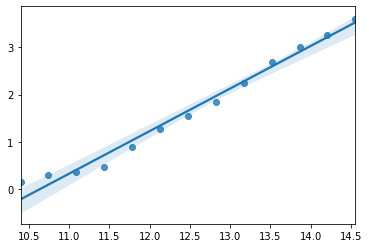

In [9]:
import seaborn as sb
import statsmodels
x = np.log(ns)
y = np.log(np.array(times) - np.array(times2))
sb.regplot(x, y, robust=True, fit_reg=True)
dy = y[-1] - y[1]
dx = x[-1] - x[1]
print(dy, dx)
print(dy/dx)

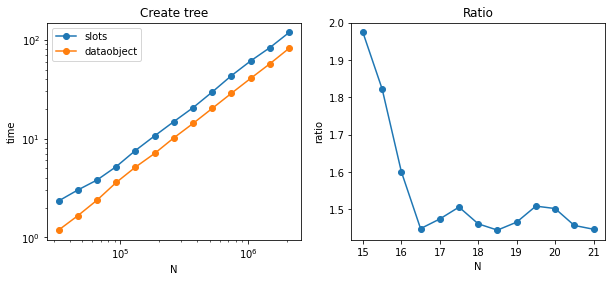

In [11]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title('Create tree')
plt.loglog(ns, times, marker='o', label='slots')
plt.loglog(ns2, times2, marker='o', label='dataobject')
plt.xlabel("N")
plt.ylabel("time")
plt.legend()
plt.subplot(1,2,2)
plt.title('Ratio')
plt.plot(np.log2(ns), [x/y for x,y in zip(times, times2)], marker='o')
plt.xlabel("N")
plt.ylabel("ratio")
plt.show()